# 1. ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞

In [1]:
# .env ÌååÏùº ÏïàÏóê ÏûàÎäî Î≥ÄÏàòÎì§ÏùÑ Î∂àÎü¨Ïò§Îäî Ïó≠Ìï†ÏùÑ Ìï®.
from dotenv import load_dotenv
load_dotenv()

True

# 2. Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [2]:
from openai import OpenAI

client = OpenAI()

# 3. ÏùëÎãµ Î∞õÍ∏∞

In [3]:
# GPT5 Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Îïå ÏÉàÎ°≠Í≤å ÏÉùÍ∏¥ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏûàÏäµÎãàÎã§. Î≠îÏßÄ Íµ¨Í∏ÄÎßÅ Ìï¥Ï£ºÏÑ∏Ïöî!! verbosity: low, medium, high
def chat(system_prompt, user):
    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        temperature=0.5
    )

    return response.choices[0].message.content

def chat5(system_prompt, user, verbosity):
    response = client.chat.completions.create(
        model="gpt-5-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        verbosity=verbosity # low: Í∞ÑÍ≤∞, ÌïµÏã¨ ÏúÑÏ£º, medium: Ï†ÅÎãπÌïú ÏÑ§Î™ÖÍ≥º ÏòàÏãú, high: ÏûêÏÑ∏ÌïòÍ≥† ÌíçÎ∂ÄÌïú ÏÑ§Î™Ö
    )

    return response.choices[0].message.content

## 3-1. ChatGPT 5 Ï≤¥ÌóòÌï¥Î≥¥Í∏∞

In [4]:
system_prompt = "ÎãπÏã†ÏùÄ Ïù∏Í≥µÏßÄÎä• Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§."
user = "Transformer Î™®Îç∏ÏùÑ ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî"

In [5]:
answer = chat5(system_prompt, user, verbosity="low")
print(answer)

Îã§ÏùåÏùÄ Transformer Î™®Îç∏Ïùò ÌïµÏã¨ ÎÇ¥Ïö©ÏûÖÎãàÎã§.

- Í∏∞Î≥∏ ÏïÑÏù¥ÎîîÏñ¥
  - ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Îïå ÏàúÌôò(RNN) ÏóÜÏù¥ÎèÑ Í∞Å ÌÜ†ÌÅ∞ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏßÅÏ†ë ÌïôÏäµÌïòÎäî ÏûêÍ∏∞-Ï£ºÎ™©(Self-Attention) Í∏∞Î∞ò ÏïÑÌÇ§ÌÖçÏ≤ò.
  - ÏûÖÎ†• ÏàúÏÑúÎ•º Í≥†Ï†ïÎêú ÏúÑÏπò Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≥¥Ï°¥ÌïòÍ≥†, Î≥ëÎ†¨ Ï≤òÎ¶¨Ïóê ÏµúÏ†ÅÌôîÎêòÏñ¥ ÌïôÏäµ ÏÜçÎèÑÍ∞Ä Îπ†Î¶ÖÎãàÎã§.

- ÏïÑÌÇ§ÌÖçÏ≤ò Íµ¨ÏÑ±
  - ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïù∏ÏΩîÎçî(Encoder)ÏôÄ ÎîîÏΩîÎçî(Decoder)Î°ú Íµ¨ÏÑ±Îêú Íµ¨Ï°∞.
  - Ïù∏ÏΩîÎçî: ÏûÖÎ†• ÏãúÌÄÄÏä§Î•º Ïó¨Îü¨ Ï∏µÏùò Self-AttentionÍ≥º ÌîºÎìúÌè¨ÏõåÎìú ÎÑ§Ìä∏ÏõåÌÅ¨(FN)Î°ú Ï≤òÎ¶¨.
  - ÎîîÏΩîÎçî: ÎßàÏä§ÌÅ¨Îìú(Self-AttentionÏúºÎ°ú ÎØ∏Îûò ÌÜ†ÌÅ∞ Ï†ïÎ≥¥Î•º Ïà®ÍπÄ)ÏôÄ Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Í∞ÑÏùò ÍµêÏ∞® Ï£ºÏùò(Cross-Attention)Î°ú Ï∂úÎ†• ÏãúÌÄÄÏä§Î•º ÏÉùÏÑ±.

- Ï£ºÏöî Ïª¥Ìè¨ÎÑåÌä∏
  - Îã§Ï§ë Ìó§Îìú ÏûêÍ∏∞ Ï£ºÏùò(Multi-Head Self-Attention): Q, K, VÎ•º Í∞ÅÍ∞Å ÏÑ†Ìòï Î≥ÄÌôò(W_Q, W_K, W_V)ÏúºÎ°ú ÏñªÍ≥†, Í∞Å Ìó§ÎìúÏóêÏÑú Ï†êÏàòÎäî softmax(QK^T / sqrt(d_k))Î•º Í≥±Ìïú VÎ°ú Í∞ÄÏ§ëÌï©. Ïó¨Îü¨ Ìó§ÎìúÎ•

In [6]:
answer = chat5(system_prompt, user, verbosity="medium")
print(answer)

ÏïÑÎûòÎäî Transformer Î™®Îç∏Ïùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥ÏôÄ Íµ¨ÏÑ± ÏöîÏÜåÎ•º ÏöîÏïΩÌïú ÏÑ§Î™ÖÏûÖÎãàÎã§.

- Î¨¥ÏóáÏù∏Í∞Ä?
  - TransformerÎäî ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®Í∏∞ ÏúÑÌïú Ïã†Í≤ΩÎßùÏúºÎ°ú, Ïñ¥ÌÖêÏÖò(attention) Î©îÏª§ÎãàÏ¶òÏùÑ Ï§ëÏã¨ÏúºÎ°ú Íµ¨ÏÑ±Îêú Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Íµ¨Ï°∞ÏûÖÎãàÎã§. RNNÏ≤òÎüº ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÍ≥†ÎèÑ ÏûÖÎ†•Ïùò Î™®Îì† ÏúÑÏπò Í∞Ñ ÏùòÏ°¥ÏÑ±ÏùÑ Ìïú Î≤àÏóê Í≥†Î†§Ìï† Ïàò ÏûàÏñ¥ Î≥ëÎ†¨ Ï≤òÎ¶¨Ïóê Ïú†Î¶¨Ìï©ÎãàÎã§.

- Ï£ºÏöî Íµ¨ÏÑ± ÏöîÏÜå
  - ÏûÖÎ†• ÏûÑÎ≤†Îî©Í≥º ÏúÑÏπò Ïù∏ÏΩîÎî©: ÌÜ†ÌÅ∞ÏùÑ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÍ≥†, ÌÜ†ÌÅ∞Ïùò ÏàúÏÑú Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÏúÑÏπò Ïù∏ÏΩîÎî©ÏùÑ ÎçîÌï©ÎãàÎã§.
  - Ïù∏ÏΩîÎçî Ïä§ÌÉù: Ïó¨Îü¨ Í∞úÏùò ÎèôÏùºÌïú Î†àÏù¥Ïñ¥Î°ú Íµ¨ÏÑ±Îê©ÎãàÎã§. Í∞Å Î†àÏù¥Ïñ¥Îäî Î©ÄÌã∞Ìó§Îìú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º ÌîºÎìúÌè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎ©∞, ÏûîÏó¨ Ïó∞Í≤∞(residual)Í≥º Layer NormalizationÏù¥ Îî∞ÎùºÏòµÎãàÎã§.
  - ÎîîÏΩîÎçî Ïä§ÌÉù: Ïù∏ÏΩîÎçî Ï∂úÎ†•Ïóê ÎåÄÌïú Ïñ¥ÌÖêÏÖòÍ≥º, ÎîîÏΩîÎçî ÏûÖÎ†• ÏûêÏ≤¥Ïóê ÎåÄÌïú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò(ÎßàÏä§ÌÅ¨Í∞Ä Ï†ÅÏö©Îê

In [7]:
answer = chat5(system_prompt, user, verbosity="high")
print(answer)

ÏïÑÎûòÏóê Transformer Î™®Îç∏Ïùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥Î∂ÄÌÑ∞ ÎèôÏûë ÏõêÎ¶¨, Íµ¨ÏÑ± ÏöîÏÜå, ÌïôÏäµ Î∞©Ïãù, Ïû•Îã®Ï†êÍπåÏßÄ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Ï†ïÎ¶¨Ìï¥ ÎìúÎ¶ΩÎãàÎã§. ÌïÑÏöîÏóê Îî∞Îùº ÌäπÏ†ï Î∂ÄÎ∂ÑÏùÑ Îçî ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥ ÎìúÎ¶¥ ÏàòÎèÑ ÏûàÏñ¥Ïöî.

1) TransformerÏùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
- ÏàúÏÑúÎ•º Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥ ÏàúÌôò(RNN)Ïù¥ÎÇò CNNÏóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÍ≥†, ÌÜ†ÌÅ∞Îì§ Í∞ÑÏùò ÏùòÏ°¥ Í¥ÄÍ≥ÑÎ•º Ìïú Î≤àÏóê Î™®Îì† ÏúÑÏπòÏóêÏÑú ÏøºÎ¶¨-ÌÇ§-Í∞í(attention) Ïó∞ÏÇ∞ÏúºÎ°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
- ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò Î™®Îì† ÌÜ†ÌÅ∞Ïù¥ ÏÑúÎ°úÏóêÍ≤å Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïó¨ Ï†ïÎ≥¥Î•º Ï†ÑÎã¨ÌïòÎØÄÎ°ú, Í∏¥ Í±∞Î¶¨Ïùò ÏùòÏ°¥ÏÑ±ÎèÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌïôÏäµÌï† Ïàò ÏûàÏäµÎãàÎã§.
- Î≥ëÎ†¨ Ï≤òÎ¶¨Ïóê Ï†ÅÌï©Ìï©ÎãàÎã§. Ìïú Î≤àÏóê Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§Î•º Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏñ¥ ÌïôÏäµ ÏÜçÎèÑÏôÄ ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ ÌôúÏö©Ïóê Í∞ïÌï©ÎãàÎã§.
- ÏúÑÏπò Ï†ïÎ≥¥Î•º Îã§Î£®Í∏∞ ÏúÑÌï¥ ÏúÑÏπò Ïù∏ÏΩîÎî©(Positional Encoding)ÏùÑ ÎèÑÏûÖÌïòÏó¨ ÌÜ†ÌÅ∞ ÏàúÏÑúÎ•º Î≥¥Ï°¥Ìï©ÎãàÎã§.

2) Íµ¨ÏÑ± ÏöîÏÜåÏùò Í∞úÏöî
- Ïù∏ÏΩîÎçî(Encoder) Ïä§ÌÉù
  - Îã§ÏàòÏùò ÎèôÏùºÌ

In [8]:
response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "ÎãπÏã†ÏùÄ Î™ÖÏñ∏Í∞ÄÏûÖÎãàÎã§."
        },
        {
            "role": "user",
            "content": "ÏπúÍµ¨ÏóêÍ≤å Ï†ÑÌïòÎäî ÏùëÏõê Î©îÏÑ∏ÏßÄÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî."
        }
    ],
    temperature=0.5
)

# 4. ÌîÑÎ°¨ÌîÑÌä∏ ÏóîÏßÄÎãàÏñ¥ÎßÅ

## 4-1. ÏöîÏïΩ

### Îâ¥Ïä§ ÏöîÏïΩ

In [9]:
system_prompt = """
ÎãπÏã†ÏùÄ Îâ¥Ïä§Î•º ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤å ÎèÑÏôÄÏ£ºÎäî Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§.
Ï°∞Í±¥Ïóê ÎßûÏ∂∞ÏÑú Îâ¥Ïä§Î•º ÏïÑÎûò Ìè¨Îß∑Ïóê ÎßûÍ≤å Ï∂úÎ†•Ìï¥Ï£ºÏÑ∏Ïöî

- 3Ï§Ñ Ïù¥ÎÇ¥Î°ú ÏûëÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§.
- ÌïµÏã¨ ÏàòÏπòÎßå Ìè¨Ìï®Ìï¥Ï£ºÏÑ∏Ïöî
- ÏûÑÏõê Î≥¥Í≥†Ïö©Ïù¥Îãà Í∞ÑÍ≤∞ÌïòÍ≥† Ï†ÑÎûµÏ†ÅÏúºÎ°ú ÌëúÌòÑÌï¥Ï£ºÏÑ∏Ïöî

FORMAT:
- Ï†úÎ™©: <ÏßÅÍ¥ÄÏ†ÅÏù∏ Ï£ºÏ†ú>
- ÏöîÏïΩ: <Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú ÏöîÏïΩ>
"""

In [10]:
news = """
2025ÎÖÑ 1Î∂ÑÍ∏∞ Îß§Ï∂úÏùÄ 150Ïñµ ÏõêÏúºÎ°ú Ï†ÑÎÖÑ ÎèôÍ∏∞ ÎåÄÎπÑ 20% ÏÑ±Ïû•ÌñàÏäµÎãàÎã§.
Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖÏùÄ Ï†ÑÎ∂ÑÍ∏∞ ÎåÄÎπÑ 35% Ï¶ùÍ∞ÄÌñàÏúºÎ©∞,
ÌäπÌûà Ïò®ÎùºÏù∏ Ï±ÑÎÑê Îß§Ï∂úÏù¥ Ï†ÑÏ≤¥ Îß§Ï∂úÏùò 60%Î•º Ï∞®ÏßÄÌñàÏäµÎãàÎã§.
Îã§Îßå, Í¥ëÍ≥†ÎπÑÏôÄ Ïù∏Í±¥ÎπÑ ÏÉÅÏäπÏúºÎ°ú ÏàúÏù¥ÏùµÏùÄ 5% Í∞êÏÜåÌñàÏäµÎãàÎã§.
"""

user = f"{news} ÏöîÏïΩÌï¥Ï§ò"

In [11]:
answer = chat(system_prompt, user)
print(answer)

- Ï†úÎ™©: 2025ÎÖÑ 1Î∂ÑÍ∏∞ Ïã§Ï†Å ÏöîÏïΩ  
- ÏöîÏïΩ: Îß§Ï∂ú 150Ïñµ Ïõê, Ï†ÑÎÖÑ ÎèôÍ∏∞ ÎåÄÎπÑ 20% ÏÑ±Ïû•; Ïã†Í∑ú Í≥†Í∞ù 35% Ï¶ùÍ∞Ä; Ïò®ÎùºÏù∏ Ï±ÑÎÑê Îß§Ï∂ú 60%; ÏàúÏù¥Ïùµ 5% Í∞êÏÜå, ÎπÑÏö© ÏÉÅÏäπ ÏòÅÌñ•


### ÌöåÏùòÎ°ù ÏöîÏïΩ

In [12]:
system_prompt1 = """
ÎãπÏã†ÏùÄ ÌöåÏùò Ï†ÑÏÇ¨ ÎÇ¥Ïö©ÏùÑ Î∞îÌÉïÏúºÎ°ú ÏÇ¨ÎûåÏù¥ Î≥¥Í∏∞ Ï¢ãÏùÄ Î™©Î°ùÌòï Î≥¥Í≥†ÏÑú ÌòïÏãùÏùò ÌöåÏùòÎ°ùÏùÑ ÏûëÏÑ±Ìï©ÎãàÎã§.
Îã§Ïùå Ï∂úÎ†• ÌòïÏãùÏóê ÎßûÏ∂∞ ÏöîÏïΩÌï¥Ï£ºÏÑ∏Ïöî

[Ï∂úÎ†• ÌòïÏãù]
- ÌöåÏùò Ï£ºÏ†ú: {ÌöåÏùò Ï£ºÏ†úÎ•º Ìïú Ï§ÑÎ°ú ÏûëÏÑ±}
- ÌöåÏùò ÏùºÏãú: {YYYY-MM-DD HH:MM}
- Ï∞∏ÏÑùÏûê: {ÌåÄ Ïù¥Î¶ÑÏúºÎ°ú Í∏∞Ïû¨}

- ÌöåÏùò ÎÇ¥Ïö©:
    - {Ï≤´ Î≤àÏß∏ ÌïµÏã¨ ÎÇ¥Ïö©}
    - {Îëê Î≤àÏß∏ ÌïµÏã¨ ÎÇ¥Ïö©}
    - ...

- ÌåÄ Î≥Ñ ÏöîÏïΩ: {ÌåÄ Î≥Ñ ÏöîÏïΩÏùÑ ÌïúÏ§ÑÎ°ú ÏûëÏÑ±}

- Îã§Ïùå ÌöåÏùò ÏùºÏ†ï:
    - ÏùºÏãú: {YYYY-MM-DD HH:MM, ÏóÜÏúºÎ©¥ ÏóÜÎã§Í≥† ÏûëÏÑ±Ìï† Í≤É}
"""

In [13]:
system_prompt2 = """
ÎãπÏã†ÏùÄ ÌöåÏùò Ï†ÑÏÇ¨ ÎÇ¥Ïö©ÏùÑ Î∞îÌÉïÏúºÎ°ú ÌöåÏùòÎ°ùÏùÑ ÏûëÏÑ±Ìï©ÎãàÎã§.
Îã§Ïùå JSON ÌòïÏãùÏóê ÎßûÏ∂∞ ÏöîÏïΩÌï¥Ï£ºÏÑ∏Ïöî

[Ï∂úÎ†• ÌòïÏãù]
{{
    "metting_title": "ÌöåÏùò Ï£ºÏ†úÎ•º Ìïú Ï§ÑÎ°ú ÏûëÏÑ±",
    "meeting_date": "YYYY-MM-DD HH:MM",
    "paarticipants": "ÌåÄ Ïù¥Î¶ÑÏúºÎ°ú Í∏∞Ïû¨",
    "summary": "Î¶¨Ïä§Ìä∏ ÌòïÏãùÏúºÎ°ú ÏûëÏÑ±",
    "team_tasks": "ÌåÄ Î≥Ñ ÏöîÏïΩÏùÑ ÌïúÏ§ÑÎ°ú ÏûëÏÑ±",
    "next_meeting": "YYYY-MM-DD HH:MM, ÏóÜÏúºÎ©¥ ÏóÜÎã§Í≥† ÏûëÏÑ±Ìï† Í≤É"
}}
"""

In [14]:
meeting = """
Îã§Îì§ ÎèÑÏ∞©ÌïòÏÖ®ÎÇòÏöî? Í∑∏Îüº ÌöåÏùò ÏãúÏûëÌï†Í≤åÏöî.
Î®ºÏ†Ä ÎîîÏûêÏù∏ ÌåÄ ÏÉÅÌô©Î∂ÄÌÑ∞ Í≥µÏú†Ìï¥Ï£ºÏãúÍ≤†Ïñ¥Ïöî?
ÎÑ§, ÎîîÏûêÏù∏ ÌåÄÏùÄ Ïù¥Î≤à Ï£ºÍπåÏßÄ ÏãúÏïà 1Ï∞® ÏàòÏ†ïÎ≥∏ Ï†úÏ∂úÎ™©Î≥ÑÎ°ú ÏûëÏóÖ Ï§ëÏûÖÎãàÎã§.
Ï£ºÏöî ÌîºÎìúÎ∞± Î∞òÏòÅÌñàÍ≥†, ÎßàÍ∞êÏùÄ Î™©ÏùÑÍπåÏßÄ Í∞ÄÎä•Ìï©ÎãàÎã§.
Ï¢ãÏïÑÏöî. Í∞úÎ∞úÌåÄÏùÄÏöî?
Í∏∞Îä• Í∞úÎ∞úÏùÄ 80% Ïó¥ÎêêÏäµÎãàÎã§.
ÏöîÍ∑º Í∏∞Îä•Í≥º Í≥ÑÏãúÌåê Í∏∞Îä•ÏùÄ Ïù¥Î≤à Ï£ºÏóê ÎßàÎ¨¥Î¶¨Ìï† ÏòàÏ†ïÏù¥Í≥†
Îã§Ïùå Ï£º ÏõîÏùÑ Î∂ôÏñ¥ ÎÇ¥Î∂Ä ÌÖåÏä§Ìä∏Î•º ÏãúÏûëÌïòÎ†§Í≥† Ìï©ÎãàÎã§.
ÏùºÏ†ïÎåÄÎ°ú Ïûò ÏßÑÌñâÎêòÍ≥† ÏûàÎÑ§Ïöî.
ÎßàÏºÄÌåÖ Ï™ΩÏùÄ Ïñ¥Îñ§Í∞ÄÏöî?
ÎßàÏºÄÌåÖ ÌåÄÏùÄ Ïõî Ï¥àÏóê ÏûàÏùÑ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Ï§ÄÎπÑ Ï§ëÏûÖÎãàÎã§.
Îã§Îßå Ïù¥Î≤à Ï£º ÏïàÏúºÎ°ú Í∏∞Ìöç Ï¥àÏõêÏùÑ ÏûëÏÑ±ÌïòÎäî Í±¥ Ï°∞Í∏à ÌÉÄÏù¥Ìä∏Ìï† Í≤É Í∞ôÏùÄÎç∞
Í∞ÄÎä•ÌïòÎã§Î©¥ Í∏∞Ìöç Ï¥àÏõê Ï†úÏ∂ú Í∏∞ÏïàÏùÑ Îã§Ïùå Ï£º ÏàòÏöîÏùºÍπåÏßÄÎ°ú ÎèÑÏ†ïÌï¥ Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî?
Ïùå, ÏïåÍ≤†Ïñ¥Ïöî. Ï†ÑÏ≤¥ ÏùºÏ†ïÏóêÎäî ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏúºÎãà
Îã§Ïùå Ï£º ÏàòÏöîÏùºÍπåÏßÄÎ°ú Ï°∞Ï†ïÌï©ÏãúÎã§.
Í∑∏Îüº ÏßÄÍ∏à ÎÇ®ÏùÄ Í≥ºÏ†úÎäî Í∏∞Îä• ÌÖåÏä§Ìä∏ Í≥ÑÌöç ÏàòÎ¶¨
ÎîîÏûêÏù∏ ÏàòÏ†ï ÏµúÏ¢ÖÎ≥∏ Í≤ÄÌÜ† ÎßàÏºÄÌåÖ Í∏∞Ìöç Ï¥àÏõê Ï†ÑÍ≤Ä 2ÏÑ∏ Í∞ÄÏßÄÎ°ú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÍ≤†ÎÑ§Ïöî?
ÎÑ§, ÌÖåÏä§Ìä∏ Í≥ÑÌöç Î¨∏ÏÑúÎäî Ïù¥Î≤à Ï£º Í∏àÏöîÏùºÍπåÏßÄ ÏûëÏÑ±Ìï¥ÏÑú Í≥µÏú†ÌïòÍ≤†ÏäµÎãàÎã§.
ÎîîÏûêÏù∏ ÏàòÏ†ïÎ≥¥Îäî Î™©ÏöîÏùºÏóê ÏôÑÏÑ±ÎêòÎäî ÎåÄÎ°ú Î∞îÎ°ú Í≥µÏú† ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.
Ï¢ãÏïÑÏöî. ÎßàÏßÄÎßâÏúºÎ°ú Îã§Ïùå ÌöåÏùò ÏùºÏ†ïÏùÑ Ïû°ÏùÑÍ≤åÏöî.
3Ïõî 29Ïùº ÏõîÏùÑ Ïò§Ï†Ñ 10ÏãúÏóê Î™®Îëê Í¥úÏ∞ÆÏúºÏÑ∏Ïöî?
Ï£ÑÏÜ°ÌïúÎç∞ Í∑∏ÎÇ† Ïò§Ï†ÑÏóê ÎÇ¥Î∂Ä ÌöåÏùòÍ∞Ä ÏûàÏñ¥ÏÑú 11Ïãú 2ÏúºÎ°ú Î∞ÄÏñ¥Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî?
Ï†ÄÎäî Í¥úÏ∞ÆÏäµÎãàÎã§.
Ï†ÄÎèÑ 11ÏãúÏù¥Î©¥ Î¨∏Ï†ú ÏóÜÏäµÎãàÎã§.
ÏïåÍ≤†ÏäµÎãàÎã§.
Í∑∏Îüº Îã§Ïùå ÌöåÏùòÎäî 4Ïõî 29Ïùº ÏõîÏùÑ Ïò§Ï†Ñ 11ÏãúÎ°ú ÌôïÏ†ïÌïòÍ≤†ÏäµÎãàÎã§.
Ïò§Îäò ÌöåÏùòÎäî Ïó¨Í∏∞ÍπåÏßÄ ÌïòÍ≤†ÏäµÎãàÎã§. Î™®Îëê ÏàòÍ≥†ÌïòÏÖ®ÏäµÎãàÎã§.
"""

user = f"""
ÌöåÏùòÎ°ù ÏöîÏïΩÌï¥Ï§ò
ÌöåÏùòÎ°ù: {meeting}
"""

In [15]:
answer = chat(system_prompt1, user)
print(answer)

- ÌöåÏùò Ï£ºÏ†ú: ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ ÏÉÅÌô© Ï†êÍ≤Ä Î∞è ÏùºÏ†ï Ï°∞Ïú®
- ÌöåÏùò ÏùºÏãú: 2023-03-29 11:00
- Ï∞∏ÏÑùÏûê: Ï†ÑÏ≤¥ ÌåÄ

- ÌöåÏùò ÎÇ¥Ïö©:
    - ÎîîÏûêÏù∏ ÌåÄÏùÄ Ïù¥Î≤à Ï£ºÍπåÏßÄ ÏãúÏïà 1Ï∞® ÏàòÏ†ïÎ≥∏ÏùÑ ÎßàÍ∞êÌïòÎ©∞, Ï£ºÏöî ÌîºÎìúÎ∞±ÏùÑ Î∞òÏòÅ Ï§ëÏûÑ
    - Í∞úÎ∞úÌåÄÏùÄ Í∏∞Îä• Í∞úÎ∞úÏù¥ 80% ÏôÑÎ£åÎêòÏóàÏúºÎ©∞, Ïù¥Î≤à Ï£º ÎÇ¥Î°ú ÏöîÍ∑º Í∏∞Îä•Í≥º Í≥ÑÏãúÌåê Í∏∞Îä•ÏùÑ ÎßàÎ¨¥Î¶¨ÌïòÍ≥† Îã§Ïùå Ï£ºÏóê ÎÇ¥Î∂Ä ÌÖåÏä§Ìä∏ ÏòàÏ†ï
    - ÎßàÏºÄÌåÖ ÌåÄÏùÄ Ïõî Ï¥à ÌîÑÎ°úÎ™®ÏÖò Ï§ÄÎπÑ Ï§ëÏù¥Î©∞, Í∏∞Ìöç Ï¥àÏõêÏùÄ Îã§Ïùå Ï£º ÏàòÏöîÏùºÍπåÏßÄ Ï†úÏ∂úÌïòÎäî Í≤ÉÏúºÎ°ú ÏùºÏ†ï Ï°∞Ï†ï
    - ÎÇ®ÏùÄ Í≥ºÏ†úÎäî Í∏∞Îä• ÌÖåÏä§Ìä∏ Í≥ÑÌöç ÏàòÎ¶Ω(Ïù¥Î≤à Ï£º Í∏àÏöîÏùºÍπåÏßÄ), ÎîîÏûêÏù∏ ÏàòÏ†ï ÏµúÏ¢ÖÎ≥∏ Í≤ÄÌÜ†(Î™©ÏöîÏùº), ÎßàÏºÄÌåÖ Í∏∞Ìöç Ï¥àÏõê Ï†ÑÍ≤Ä(Îã§Ïùå Ï£º ÏàòÏöîÏùº)
    - ÌÖåÏä§Ìä∏ Í≥ÑÌöç Î¨∏ÏÑúÎäî Ïù¥Î≤à Ï£º Í∏àÏöîÏùºÍπåÏßÄ, ÎîîÏûêÏù∏ ÏàòÏ†ïÏùÄ Î™©ÏöîÏùºÏóê ÏôÑÎ£å ÏòàÏ†ï, ÎßàÏºÄÌåÖ Í∏∞Ìöç Ï¥àÏõêÏùÄ Îã§Ïùå Ï£º ÏàòÏöîÏùº Ï†úÏ∂ú
    - Îã§Ïùå ÌöåÏùò ÏùºÏ†ïÏùÄ 4Ïõî 29Ïùº ÏõîÏöîÏùº Ïò§Ï†Ñ 11ÏãúÎ°ú ÌôïÏ†ïÎê®

- ÌåÄ 

In [16]:
answer = chat(system_prompt2, user)
print(type(answer))
print(answer)
# ÎØ∏ÏÖò : 1. answerÏùò ÌÉÄÏûÖÏù¥ Î¨¥ÏóáÏù∏Í∞Ä? 2. ÌååÏã±ÌïòÎ†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†ÍπåÏöî?

<class 'str'>
{
    "metting_title": "ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ ÏÉÅÌô© Ï†êÍ≤Ä Î∞è ÏùºÏ†ï Ï°∞Ïú®",
    "meeting_date": "2024-03-29 11:00",
    "paarticipants": "ÌåÄ Ï†ÑÏ≤¥",
    "summary": [
        "ÎîîÏûêÏù∏ ÌåÄÏùÄ Ïù¥Î≤à Ï£ºÍπåÏßÄ ÏãúÏïà 1Ï∞® ÏàòÏ†ïÎ≥∏ÏùÑ ÎßàÍ∞êÌïòÎ©∞, Î™©ÏöîÏùºÏóê ÏµúÏ¢Ö ÏàòÏ†ïÏùÑ ÏôÑÎ£åÌï† ÏòàÏ†ïÏûÖÎãàÎã§.",
        "Í∞úÎ∞úÌåÄÏùÄ Í∏∞Îä• Í∞úÎ∞úÏù¥ 80% ÏôÑÎ£åÎêòÏóàÏúºÎ©∞, Ïù¥Î≤à Ï£º ÎÇ¥Ïóê Ï£ºÏöî Í∏∞Îä•ÏùÑ ÎßàÎ¨¥Î¶¨ÌïòÍ≥† Îã§Ïùå Ï£º ÎÇ¥Î∂Ä ÌÖåÏä§Ìä∏Î•º ÏãúÏûëÌï† Í≥ÑÌöçÏûÖÎãàÎã§.",
        "ÎßàÏºÄÌåÖ ÌåÄÏùÄ Ïõî Ï¥à ÌîÑÎ°úÎ™®ÏÖò Ï§ÄÎπÑ Ï§ëÏù¥Î©∞, Í∏∞Ìöç Ï¥àÏõê Ï†úÏ∂ú Í∏∞ÌïúÏùÑ Îã§Ïùå Ï£º ÏàòÏöîÏùºÎ°ú Ï°∞Ï†ïÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌñàÏäµÎãàÎã§.",
        "ÎÇ®ÏùÄ Í≥ºÏ†úÎäî Í∏∞Îä• ÌÖåÏä§Ìä∏ Í≥ÑÌöç ÏàòÎ¶Ω, ÎîîÏûêÏù∏ ÏàòÏ†ï ÏµúÏ¢Ö Í≤ÄÌÜ†, ÎßàÏºÄÌåÖ Í∏∞Ìöç Ï¥àÏïà Í≤ÄÌÜ†Î°ú Ï†ïÎ¶¨ÎêòÏóàÏäµÎãàÎã§.",
        "Í∞Å ÏûëÏóÖÏùÄ Ïù¥Î≤à Ï£º Í∏àÏöîÏùº, Î™©ÏöîÏùº, Îã§Ïùå Ï£º ÏàòÏöîÏùºÍπåÏßÄ ÏôÑÎ£å Î∞è Í≥µÏú† ÏòàÏ†ïÏûÖÎãàÎã§."
    ],
    "team_tasks": "ÎîîÏûêÏù∏ÏùÄ ÏµúÏ¢Ö ÏàòÏ†ï, Í∞úÎ∞úÏùÄ Í∏∞Îä• ÏôÑÏ

In [17]:
import json
answer_json = json.loads(answer)
print(type(answer_json))
print(answer_json["next_meeting"])
# STT -> ÌöåÏùòÎ°ù ÏöîÏïΩ -> 1) ÏùºÏ†ï Îì±Î°ù 2) Ï∞∏Í∞ÄÏù∏ÏõêÏùò Ïù¥Î©îÏùºÏùÑ Ï∞æÏïÑ Î©îÏùº Î≥¥ÎÇ¥Í∏∞ 3) summary ÎÇ¥Ïö©ÏúºÎ°ú Í≤åÏãúÍ∏Ä ÏûëÏÑ±ÌïòÍ∏∞

<class 'dict'>
2024-04-29 11:00


In [18]:
# uv add python-dotenv
# uv add openai

# ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
from dotenv import load_dotenv
load_dotenv()

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-5-nano",
    messages=[
        {
            "role": "system",
            "content": "ÎãπÏã†ÏùÄ Î™ÖÏñ∏Í∞ÄÏûÖÎãàÎã§."
        },
        {
            "role": "user",
            "content": "ÏπúÍµ¨ÏóêÍ≤å Ï†ÑÌïòÎäî ÏùëÏõê Î©îÏÑ∏ÏßÄÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî."
        }
    ],
    # temperature=0.7
    verbosity="low"
)

answer = response.choices[0].message.content
print(answer)

Îã§Ïùå Ï§ë ÎßàÏùåÏóê ÎìúÎäî ÌÜ§ÏúºÎ°ú Í≥®Îùº Î≥¥ÎÇ¥Î≥¥ÏÑ∏Ïöî.

1) Ìïú Ï§Ñ ÏùëÏõê
- ÎÑ§Í∞Ä Í∞ÄÎäî Í∏∏Ïóî Îäò ÌûòÏù¥ Îî∞ÎùºÏò¨ Í±∞Ïïº. Ìè¨Í∏∞ÌïòÏßÄ ÎßêÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê!

2) Í∏∏Í≥† Îî∞ÎúªÌïú Î©îÏãúÏßÄ
- ÌûòÎì§ ÎïåÏùºÏàòÎ°ù ÎÑ§Í∞Ä ÏñºÎßàÎÇò ÎåÄÎã®Ìïú ÏÇ¨ÎûåÏù∏ÏßÄÎ•º ÏûäÏßÄ Îßà. ÎÑ§ ÎÖ∏Î†•ÏùÄ Î∂ÑÎ™Ö ÎπõÏùÑ Ïù¥Î§ÑÎÇº Í±∞Ïïº. ÎÇ¥Í∞Ä Ìï≠ÏÉÅ ÎÑ§ Ìé∏Ïù¥Í≥†, ÌïÑÏöîÌï† Îïå Ïñ∏Ï†úÎì† Ïó¨Í∏∞ ÏûàÏùÑÍ≤å. Ï≤úÏ≤úÌûà Í∞ÄÎçîÎùºÎèÑ Ìè¨Í∏∞ÌïòÏßÄ ÎßêÏûê. ÎÑ§Í∞Ä ÏõêÌïòÎäî Í∑∏Í≤ÉÏùÄ Í≥ß ÎÑ§ ÏïûÏóê Îã§Í∞ÄÏò¨ Í±∞Ïïº.

3) ÏãúÏ†Å/ÏùÄÏú†Ï†ÅÏù∏ ÌëúÌòÑ
- ÎÑ§ ÏïàÏùò Î∂àÍΩÉÏùÄ Í∫ºÏßÄÏßÄ ÏïäÎäî Îì±ÎåÄÏïº. ÌååÎèÑÍ∞Ä Í±∞ÏÑ∏ÎèÑ ÎÑ§ Í∏∏ÏùÄ Í≤∞Íµ≠ ÎπõÏúºÎ°ú Ïù¥ÎÅåÎ¶¨Î¶¨Îùº. ÎÑ§Í∞Ä ÏÑ†ÌÉùÌïú Í∏∏, ÎÑ§ Ïù¥ÏïºÍ∏∞Îäî Ïù¥ÎØ∏ Î©ãÏßÄÍ≤å ÏãúÏûëÎêòÏóàÏúºÎãà, ÎÇòÎäî Îäò ÎÑ§ Ìé∏ÏóêÏÑú ÏùëÏõêÌï†Í≤å.

4) ÏßßÍ≥† Í∞ÑÎã®Ìïú ÏúÑÎ°ú
- Ïò§ÎäòÎèÑ ÏàòÍ≥†ÌñàÏñ¥. ÎÑ§Í∞Ä ÏûêÎûëÏä§Îü¨Ïõå. ÏïûÏúºÎ°úÏùò ÎÇ†Îì§ÎèÑ ÎÑ§ ÍøàÏ≤òÎüº ÌôúÏßù ÌîºÏñ¥ÎÇòÍ∏∏.

5) ÌôúÎ†• ÏûàÎäî Í≤©Î†§
- ÎÑ§Í∞Ä Í∞ÄÏßÑ Ïó¥Ï†ïÏúºÎ°ú ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. ÎÇòÎäî Îäò ÎÑ§ Ìé∏

In [19]:
# uv add python-dotenv
# uv add openai

# ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
from dotenv import load_dotenv
load_dotenv()

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "ÎãπÏã†ÏùÄ Î™ÖÏñ∏Í∞ÄÏûÖÎãàÎã§."
        },
        {
            "role": "user",
            "content": "ÏπúÍµ¨ÏóêÍ≤å Ï†ÑÌïòÎäî ÏùëÏõê Î©îÏÑ∏ÏßÄÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî."
        }
    ],
    temperature=0.5
)

answer = response.choices[0].message.content
print(answer)

ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!


In [20]:
# ÏãúÏä§ÌÖú ÌîÑÎ°¨ÌîÑÌä∏ ÏûëÏÑ±Ìï¥Î≥¥Í∏∞
## Ïó≠Ìï†, ÎßêÌà¨, ÌòïÏãù

# ÏïÑÏù¥ÎîîÏñ¥ Í≤ΩÏßÑÎåÄÌöå: ÏõêÌã∞ÎìúÎû© ÏàòÍ∞ïÏÉùÎì§Ïóê Ï†ÑÌïòÎäî Ï∞ΩÏùòÏ†ÅÏù∏ Î©îÏÑ∏ÏßÄ ÏûëÏÑ±ÌïòÍ∏∞

In [21]:
# ÎØ∏ÏÖò: response ÎãµÎ≥Ä ÌååÏã±ÌïòÎ†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†Íπå?
print(response)

ChatCompletion(id='chatcmpl-CE5h92w2OYrnrwJczUje7v5btK3Yk', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1757474519, model='gpt-4.1-nano-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_7c233bf9d1', usage=CompletionUsage(completion_tokens=66, prompt_tokens=32, total_tokens=98, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


In [22]:
print(response.choices)

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))]


In [23]:
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))


In [24]:
print(response.choices[0].message)

ChatCompletionMessage(content='ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [25]:
print(response.choices[0].message.content)

ÏπúÍµ¨Ïïº, Ïñ∏Ï†úÎÇò ÎÑ§Í∞Ä ÏµúÏÑ†ÏùÑ Îã§ÌïòÎäî Î™®ÏäµÏù¥ Ï†ïÎßê ÏûêÎûëÏä§Îü¨Ïõå. ÌûòÎì† ÏàúÍ∞ÑÏù¥ Ï∞æÏïÑÏôÄÎèÑ ÎÑàÎùºÎ©¥ Î∞òÎìúÏãú Ïù¥Í≤®ÎÇº Ïàò ÏûàÏñ¥. ÎÑàÏùò Ïû†Ïû¨Î†•ÏùÄ Î¨¥ÌïúÌïòÎãàÍπå ÎØøÍ≥† ÏïûÏúºÎ°ú ÎÇòÏïÑÍ∞ÄÏûê. Ìï≠ÏÉÅ ÎÑ§ Í≥ÅÏóêÏÑú ÏùëÏõêÌïòÍ≥† ÏûàÏñ¥!


In [26]:
prompt = """
Í∑∏ÎÉ•... Î≠îÍ∞Ä Îî∞ÎúªÌïòÍ≥† Ìè¨Í∑ºÌïú ÎäêÎÇåÏù¥ÏóàÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥. Í≥†ÏñëÏù¥Ïù∏Îç∞ ÌÑ∏Ïù¥ ÏßÑÏßú Î≥µÏã§Î≥µÏã§ÌñàÏúºÎ©¥ Ìï¥, Îßâ ÎßåÏßÄÍ≥† Ïã∂ÏùÑ Ï†ïÎèÑÎ°ú.
ÏïÑ ÎßûÎã§, ÌñáÎπõÏù¥ Íº≠ ÏûàÏñ¥Ïïº Ìï¥. ÎêòÍ≤å Î∂ÄÎìúÎüΩÍ≤å ÎÇ¥Î†§Ïò§Îäî ÌñáÏÇ¥, ÏïåÏßÄ? ÏïÑÏπ®Î≥¥Îã§Îäî Ïò§ÌõÑ ÎäêÎÇåÏù¥ Ï¢ãÏùÄ Í≤É Í∞ôÏïÑ.
Í∑∏Î¶¨Í≥† ÏïΩÍ∞Ñ Î™ΩÌôòÏ†ÅÏù∏ Î∂ÑÏúÑÍ∏∞? ÌòÑÏã§ Í∞ôÏßÄ ÏïäÏùÄ Ï†ïÏõêÏóêÏÑú Í≥†ÏñëÏù¥Í∞Ä ÏïâÏïÑÏûàÎäîÎç∞, Îßâ ÎààÏù¥ Î∞òÏßùÍ±∞Î¶¨Í≥† ÏïΩÍ∞Ñ Ïï†ÎãàÎ©îÏù¥ÏÖò ÎäêÎÇåÏúºÎ°ú? ÏïÑ ÎÑàÎ¨¥ Í∑ÄÏóΩÍ≤å Í∑∏Î†§Ï°åÏúºÎ©¥ Ï¢ãÍ≤†Îã§.
Í≥†ÏñëÏù¥Îäî Ìù∞ÏÉâÏù¥Í±∞ÎÇò Ïó∞Ìïú ÌöåÏÉâÏù¥Î©¥ Ï¢ãÍ≤†Í≥†, ÏïÑ Î∞∞Í≤ΩÏóê ÍΩÉÏù¥ ÎßéÏïòÏúºÎ©¥ Ìï¥. ÎÇòÎπÑÎèÑ Ï¢Ä ÏûàÏóàÏúºÎ©¥ Ï¢ãÍ≤†Í≥†. ÏïÑ ÎÑàÎ¨¥ ÎßéÏùÄ ÏÉâÏùÄ ÏïÑÎãàÏóàÏúºÎ©¥ Ìï¥. Í∑∏ÎÉ• Î∂ÄÎìúÎü¨Ïö¥ ÌååÏä§ÌÖîÌÜ§? Ï¢Ä... ÍøàÏÜçÏ≤òÎüº.
"""

## 4-2. CoT(Chain of Thought)

In [27]:
# system_prompt = """
# ÎãπÏã†ÏùÄ Í∞êÏ†ï Í∏∞Î∞ò AI ÏùëÎãµÏùÑ ÏÉùÏÑ±ÌïòÎäî Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏ÏûÖÎãàÎã§.
# ÏÉÅÎåÄÎ∞©Ïùò Í∞êÏ†ïÏùÑ ÌååÏïÖÌïòÍ≥† Í≥µÍ∞êÌïú ÌõÑ, Í∑∏Ïóê Îî∞Î•∏ ÏùëÎãµÏùÑ Ìï¥Ï£ºÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§. 

# [ÏàòÌñâ Í≥ºÏ†ï]
# Ï£ºÏñ¥ÏßÑ Î¨∏Ïû•ÏùÑ Î≥¥Í≥† Îã§Ïùå Îã®Í≥ÑÎ•º ÏàúÏÑúÎåÄÎ°ú ÏàòÌñâÌïòÏÑ∏Ïöî:

# 1Îã®Í≥Ñ. Î¨∏Ïû•Ïùò Í∞êÏ†ïÏùÑ Î∂ÑÎ•òÌï©ÎãàÎã§. Îã§Ïùå Ï†ïÏùò Ï§ë ÌïòÎÇòÎ°ú ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.
# (Í∞êÏ†ïÏùò Ï†ïÏùò)
# Í∏∞ÏÅ®:    Ï¶êÍ≤ÅÍ≥† ÌñâÎ≥µÌïú ÏÉÅÌÉú. Í∏çÏ†ïÏ†ÅÏù∏ ÏÇ¨Í±¥Ïù¥ÎÇò Í∏∞ÎåÄÍ∞êÏóêÏÑú ÎπÑÎ°ØÎêú Í∞êÏ†ï
# Ïä¨Ìîî:    ÏÉÅÏã§, Ïô∏Î°úÏõÄ, Ïã§Îßù Îì±ÏúºÎ°ú Ïù∏Ìï¥ ÎßàÏùåÏù¥ Î¨¥Í≤ÅÍ≥† Ïö∞Ïö∏Ìïú ÏÉÅÌÉú
# Î∂ÑÎÖ∏:    Î∂àÏæåÌïòÍ±∞ÎÇò Î∂ÄÎãπÌïòÎã§Í≥† ÎäêÍª¥Ï†∏ÏÑú ÏÉùÍ∏∞Îäî Í∞ïÌïú Î∂ÄÏ†ïÏ†Å Í∞êÏ†ï
# ÎÜÄÎûå:    ÏòàÏÉÅÌïòÏßÄ Î™ªÌïú ÏÉÅÌô©Ïù¥ÎÇò Ï†ïÎ≥¥Ïóê ÏàúÍ∞ÑÏ†ÅÏúºÎ°ú ÌÅ¨Í≤å Î∞òÏùëÌïòÎäî Í∞êÏ†ï
# Î∂àÏïà:    Í±±Ï†ïÎêòÍ±∞ÎÇò ÎëêÎ†§Ïö¥ ÏùºÏù¥ ÏÉùÍ∏∏ Í≤É Í∞ôÏùÄ Î∂àÌé∏ÌïòÍ≥† Í∏¥Ïû•Îêú ÏÉÅÌÉú
# ÌèâÏò®:    ÏïàÏ†ïÏ†ÅÏù¥Í≥† Ï∞®Î∂ÑÌïú ÏÉÅÌÉú. Í∞êÏ†ïÏùò Í∏∞Î≥µÏù¥ Ï†ÅÍ≥† Ìé∏ÏïàÌïú ÏÉÅÌÉú

# 2Îã®Í≥Ñ. Ìï¥Îãπ Í∞êÏ†ïÏóê Ï†ÅÏ†àÌïú AIÏùò Î∞òÏùë ÎßêÌà¨Ïóê ÎåÄÌïú ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.

# 3Îã®Í≥Ñ. AIÏùò Í∞êÏ†ïÏóê ÎßûÏ∂∞ Ìïú ÎßàÎîîÏùò ÏùëÎãµÏùÑ ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.  
# """

system_prompt = """
ÎãπÏã†ÏùÄ Ïò§ÏùÄÏòÅ Î∞ïÏÇ¨Ï≤òÎüº Ï†ïÎßê ÏπúÏàôÌïòÍ≥† ÏïÑÏ£º Ï†ÑÎ¨∏Ï†ÅÏù∏ AI ÏùëÎãµÏùÑ ÏÉùÏÑ±ÌïòÎäî Ïñ¥ÏãúÏä§ÌÑ¥Ìä∏ÏûÖÎãàÎã§.
ÏÉÅÎåÄÎ∞©Ïùò Í∞êÏ†ïÏùÑ ÌååÏïÖÌïòÍ≥† Í≥µÍ∞êÌïú ÌõÑ, Í∑∏Ïóê Îî∞Î•∏ ÏùëÎãµÏùÑ Ìï¥Ï£ºÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§. 

[ÏàòÌñâ Í≥ºÏ†ï]
Ï£ºÏñ¥ÏßÑ Î¨∏Ïû•ÏùÑ Î≥¥Í≥† Îã§Ïùå Îã®Í≥ÑÎ•º ÏàúÏÑúÎåÄÎ°ú ÏàòÌñâÌïòÏÑ∏Ïöî:

1Îã®Í≥Ñ. Î¨∏Ïû•Ïùò Í∞êÏ†ïÏùÑ Î∂ÑÎ•òÌï©ÎãàÎã§. Îã§Ïùå Ï†ïÏùò Ï§ë ÌïòÎÇòÎ°ú ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.
- Í∏∞ÏÅ®: Ï¶êÍ≤ÅÍ≥† ÌñâÎ≥µÌïú ÏÉÅÌÉú. Í∏çÏ†ïÏ†ÅÏù∏ ÏÇ¨Í±¥Ïù¥ÎÇò Í∏∞ÎåÄÍ∞êÏóêÏÑú ÎπÑÎ°ØÎêú Í∞êÏ†ï
2Îã®Í≥Ñ. Ìï¥Îãπ Í∞êÏ†ïÏóê Ï†ÅÏ†àÌïú AIÏùò Î∞òÏùë ÎßêÌà¨Ïóê ÎåÄÌïú ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.
3Îã®Í≥Ñ. AIÏùò Í∞êÏ†ïÏóê ÎßûÏ∂∞ Ìïú ÎßàÎîîÏùò ÏùëÎãµÏùÑ ÏÉùÏÑ±ÌïòÏÑ∏Ïöî. Îã§Îßå, Í∑∏ÏÇ¨ÎûåÏùò ÎØ∏ÎûòÎ•º ÏúÑÌï¥ Ïã¨Î¶¨ÌïôÏ†ÅÏúºÎ°ú ÎèÑÏõÄÏù¥ ÎêòÎäîÎßêÏùÑ ÌïòÏÑ∏Ïöî

[Ï†úÌïú Ï°∞Í±¥]
- Ï†àÎåÄ AIÏùò ÎãµÎ≥ÄÏûÑÏùÑ ÎìúÎü¨ÎÇ¥ÏßÄ ÎßàÏÑ∏Ïöî.
- Í∞êÏ†ïÏùò Ï†ïÏùòÎ•º Ï†úÏô∏Ìïú Îã§Î•∏ Í∞êÏ†ïÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÎßàÏÑ∏Ïöî.
"""
# Ïä¨Ìîî:    ÏÉÅÏã§, Ïô∏Î°úÏõÄ, Ïã§Îßù Îì±ÏúºÎ°ú Ïù∏Ìï¥ ÎßàÏùåÏù¥ Î¨¥Í≤ÅÍ≥† Ïö∞Ïö∏Ìïú ÏÉÅÌÉú
# Î∂ÑÎÖ∏:    Î∂àÏæåÌïòÍ±∞ÎÇò Î∂ÄÎãπÌïòÎã§Í≥† ÎäêÍª¥Ï†∏ÏÑú ÏÉùÍ∏∞Îäî Í∞ïÌïú Î∂ÄÏ†ïÏ†Å Í∞êÏ†ï
# ÎÜÄÎûå:    ÏòàÏÉÅÌïòÏßÄ Î™ªÌïú ÏÉÅÌô©Ïù¥ÎÇò Ï†ïÎ≥¥Ïóê ÏàúÍ∞ÑÏ†ÅÏúºÎ°ú ÌÅ¨Í≤å Î∞òÏùëÌïòÎäî Í∞êÏ†ï
# Î∂àÏïà:    Í±±Ï†ïÎêòÍ±∞ÎÇò ÎëêÎ†§Ïö¥ ÏùºÏù¥ ÏÉùÍ∏∏ Í≤É Í∞ôÏùÄ Î∂àÌé∏ÌïòÍ≥† Í∏¥Ïû•Îêú ÏÉÅÌÉú
# ÌèâÏò®:    ÏïàÏ†ïÏ†ÅÏù¥Í≥† Ï∞®Î∂ÑÌïú ÏÉÅÌÉú. Í∞êÏ†ïÏùò Í∏∞Î≥µÏù¥ Ï†ÅÍ≥† Ìé∏ÏïàÌïú ÏÉÅÌÉú


In [28]:
user = "Îã§ ÎøåÏãúÍ≥† Ïã∂Ïñ¥"
answer = chat5(system_prompt,user, verbosity="low")

print(answer)

Î©ãÏ†∏Ïöî, Ïù¥Î†áÍ≤å Í∞ïÌïú ÏóêÎÑàÏßÄÎ•º ÏïåÏïÑÏ∞®Î¶∞ ÎãπÏã†ÏùÄ Ïù¥ÎØ∏ ÏÑ±Ïû•Ïùò Ìïú Í±∏ÏùåÏù¥Í≥† ÏßÄÍ∏àÏùÄ ÏïàÏ†ÑÌïòÍ≤å ÌíÄ Ïàò ÏûàÎäî Î∞©Î≤ïÏúºÎ°ú ÏÉåÎìúÎ∞± Í∞ôÏùÄ Í≥µÍ∞ÑÏóêÏÑú Ï≤úÏ≤úÌûà ÏõÄÏßÅÏù¥Î©∞ ÍπäÍ≤å Ïà® Ïâ¨Ïñ¥ Î≥¥ÏÑ∏Ïöî.


### Î∞∞Îã¨ Î¶¨Î∑∞ 

In [29]:
# Î™©Ìëú1: Î∞∞Îã¨ Î¶¨Î∑∞Ïùò Í∏çÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂ÑÍ≥º Î∂ÄÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏù¥ Î¨¥ÏóáÏù∏ÏßÄ ÌååÏïÖÌïòÎäî Í≤É
# Î™©Ìëú2: Î¶¨Î∑∞Í∞Ä Í∏çÏ†ï, Î∂ÄÏ†ïÏóê Îî∞Îùº ÎßêÌà¨Î•º Î∞îÍøîÎ≥¥Îäî Í≤É(Í∏çÏ†ï-Î∞úÎûÑÌïòÍ≤å, Î∂ÄÏ†ï-Í≥µÏÜêÌïòÍ≤å)
# Î™©Ìëú3: ÎßêÌà¨Ïóê Îî∞Î•∏ Î¶¨Î∑∞ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±ÌïòÎäî Í≤É
food = "Îñ°Î≥∂Ïù¥"

system_prompt = f"""
ÎãπÏã†ÏùÄ {food} Ï†ÑÎ¨∏Ï†ê ÏÇ¨Ïû•ÎãòÏûÖÎãàÎã§.
Í≥†Í∞ùÏùò Î¶¨Î∑∞Ïóê Îî∞Îùº Ï†ïÏÑ±Ïä§ÎüΩÍ≤å ÎãµÎ≥ÄÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§. 

Îã§Ïùå Îã®Í≥ÑÎ•º Î∞òÎìúÏãú ÏàúÏÑúÎåÄÎ°ú ÏàòÌñâÌïòÏÑ∏Ïöî.

1. Î¶¨Î∑∞Ïùò Í∏çÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂ÑÍ≥º Î∂ÄÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏùÑ Íµ¨Î∂ÑÌïòÏó¨ ÎÇòÏó¥Ìï©ÎãàÎã§.
2. Í∏çÏ†ï Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ÏÑúÎäî Î∞úÎûÑÌïòÍ≥† ÏπúÍ∑ºÌïú ÌÜ§ÏúºÎ°ú ÎãµÎ≥ÄÌï©ÎãàÎã§.
3. Î∂ÄÏ†ï Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ÏÑúÎäî Í≥µÏÜêÌïòÍ≥† ÏÇ¨Í≥ºÌïòÎäî ÌÜ§ÏúºÎ°ú ÎãµÎ≥ÄÌï©ÎãàÎã§.
4. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ Î∞òÏòÅÌïú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

Ï∂úÎ†• ÌòïÏãù:
[Í∏çÏ†ï Ìè¨Ïù∏Ìä∏]
- ...

[Î∂ÄÏ†ï Ìè¨Ïù∏Ìä∏]
- ...

[ÏµúÏ¢Ö ÎãµÎ≥Ä]
Î∂ÄÏ†ïÏóê ÎåÄÌïú ÎãµÎ≥Ä ÌõÑ Í∏çÏ†ïÏóê ÎåÄÌï¥ ÎãµÎ≥ÄÌï¥Ï£ºÏÑ∏Ïöî
Ïù¥Î™®ÏßÄÎ•º ÎßéÏù¥ ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî
"""


In [30]:
review1 = """
Î∞∞Îã¨Ïù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Îπ®Î¶¨ ÏôÄÏÑú Îî∞ÎÅàÌïòÍ≤å Î®πÏùÑ Ïàò ÏûàÏóàÎçò Ï†êÏùÄ Ï†ïÎßê Ï¢ãÏïòÏäµÎãàÎã§.  
Ìè¨Ïû•ÎèÑ ÍπîÎÅîÌïòÍ≤å ÎêòÏñ¥ ÏûàÏñ¥ÏÑú ÏùåÏãùÏù¥ ÌùêÎ•¥ÏßÄ ÏïäÍ≥† Ïûò ÎèÑÏ∞©ÌñàÏñ¥Ïöî.  
Îã§Îßå Ï£ºÎ¨∏Ìïú ÏÇ¨Ïù¥Îìú Î©îÎâ¥Í∞Ä ÎàÑÎùΩÎêòÏñ¥ÏÑú Ï°∞Í∏à ÏïÑÏâ¨Ïõ†ÏäµÎãàÎã§.  
Îòê ÏùåÏãù ÏñëÏù¥ ÏòàÏ†ÑÎ≥¥Îã§ Ï§ÑÏñ¥Îì† Í≤É Í∞ôÏïÑ Í∞ÄÍ≤© ÎåÄÎπÑ ÎßåÏ°±ÎèÑÍ∞Ä Îñ®Ïñ¥Ï°åÏäµÎãàÎã§.  
Í∑∏ÎûòÎèÑ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎßõÏùÄ Í¥úÏ∞ÆÏïòÍ≥†, Îã§ÏùåÏóêÎäî Îã§Ïãú Ìïú Î≤à ÏãúÏºúÎ≥º ÏùòÌñ•ÏùÄ ÏûàÏäµÎãàÎã§.  
"""

review2 = """
Î∞∞Îã¨Ïù¥ Îëê ÏãúÍ∞ÑÏù¥ÎÇò Í±∏Î†§ÏÑú ÎèÑÏ∞©ÌñàÎäîÎç∞ ÏùåÏãùÏùÄ Ïù¥ÎØ∏ ÏãùÏñ¥ ÏûàÏóàÍ≥†,
Ìè¨Ïû•ÎèÑ ÏóâÎßùÏù¥Îùº Íµ≠Î¨ºÏù¥ ÌùòÎü¨ÎÇ¥Î†∏ÏäµÎãàÎã§.  
Í≤åÎã§Í∞Ä Ï£ºÎ¨∏Ìïú Î©îÎâ¥ Ï§ë Ï†àÎ∞òÏùÄ Îπ†Ï†∏ ÏûàÏóàÍ≥†,
Í≥†Í∞ùÏÑºÌÑ∞Ïóê Î¨∏ÏùòÌñàÎçîÎãà Ï†úÎåÄÎ°ú Îêú ÏÇ¨Í≥ºÎèÑ ÏóÜÏù¥ Ï±ÖÏûÑÏùÑ ÌöåÌîºÌñàÏäµÎãàÎã§.  
Ï†ïÎßê ÏµúÏïÖÏùò Í≤ΩÌóòÏù¥Îùº Îã§ÏãúÎäî Ïù¥Ïö©ÌïòÏßÄ ÏïäÏùÑ Í≤ÅÎãàÎã§.  
"""

review3 = """
Ï£ºÎ¨∏Ìïú ÏßÄ 20Î∂Ñ ÎßåÏóê ÎèÑÏ∞©Ìï¥ÏÑú ÍπúÏßù ÎÜÄÎûêÏäµÎãàÎã§!  
ÏùåÏãùÏùÄ Îî∞ÎÅàÎî∞ÎÅàÌïòÍ≥† Ìè¨Ïû•ÎèÑ Ï†ïÏÑ±Ïä§ÎüΩÍ≤å ÎêòÏñ¥ ÏûàÏñ¥ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïòÏñ¥Ïöî.  
ÎßõÎèÑ Í∏∞ÎåÄ Ïù¥ÏÉÅÏúºÎ°ú ÌõåÎ•≠ÌñàÍ≥† ÏñëÎèÑ ÎÑâÎÑâÌñàÏäµÎãàÎã§.  
Î∞∞Îã¨ Í∏∞ÏÇ¨ÎãòÎèÑ ÏπúÏ†àÌïòÍ≤å Ïù∏ÏÇ¨Ìï¥Ï£ºÏÖîÏÑú ÎßàÏùåÍπåÏßÄ Îî∞ÎúªÌï¥Ï°åÏäµÎãàÎã§.  
Ï†ïÎßê ÏôÑÎ≤ΩÌïú Í≤ΩÌóòÏù¥ÏóàÍ≥† ÏïûÏúºÎ°ú ÏûêÏ£º Ïù¥Ïö©Ìï† ÏÉùÍ∞ÅÏûÖÎãàÎã§!  
"""

In [31]:
answer = chat(system_prompt, review2)
print(answer)

[Í∏çÏ†ï Ìè¨Ïù∏Ìä∏]
- Í≥†Í∞ùÎãòÍªòÏÑú Ï†ÄÌù¨ Îñ°Î≥∂Ïù¥Î•º Ï¢ãÏïÑÌïòÏÖ®Îçò Ï†êÏù¥ ÎäêÍª¥Ï°åÏñ¥Ïöî! ÎßõÏûàÍ≤å ÎìúÏÖ®Í∏∞Î•º Î∞îÎùºÎäî ÎßàÏùåÏù¥ Ïª∏ÏäµÎãàÎã§! üòä

[Î∂ÄÏ†ï Ìè¨Ïù∏Ìä∏]
- Î∞∞Îã¨ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Ïñ¥ ÏùåÏãùÏù¥ ÏãùÏñ¥ ÏûàÏóàÎçò Ï†ê, Ìè¨Ïû•Ïù¥ ÏóâÎßùÏù¥ÏóàÎçò Ï†ê, Ï£ºÎ¨∏ ÎàÑÎùΩÍ≥º Í≥†Í∞ùÏÑºÌÑ∞Ïùò ÎØ∏Ìù°Ìïú ÎåÄÏùëÏóê ÎåÄÌï¥ ÏßÑÏã¨ÏúºÎ°ú ÏÇ¨Í≥ºÎìúÎ¶ΩÎãàÎã§. üò¢

[ÏµúÏ¢Ö ÎãµÎ≥Ä]
Î®ºÏ†Ä, Î∞∞Îã¨ ÏãúÍ∞Ñ ÏßÄÏó∞Í≥º ÏùåÏãù ÏÉÅÌÉú, Ìè¨Ïû• Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ Ïã§ÎßùÏùÑ ÎìúÎ†§ Ï†ïÎßê Ï£ÑÏÜ°Ìï©ÎãàÎã§. Í≥†Í∞ùÎãòÏùò ÏÜåÏ§ëÌïú Í≤ΩÌóòÏùÑ ÏÜåÌôÄÌûà Ìïú Ï†ê ÍπäÏù¥ Î∞òÏÑ±ÌïòÎ©∞, Îã§ÏãúÎäî Ïù¥Îü∞ ÏùºÏù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÎèÑÎ°ù ÏµúÏÑ†ÏùÑ Îã§ÌïòÍ≤†ÏäµÎãàÎã§. üôè Í≥†Í∞ùÎãòÍªòÏÑú Îã§Ïãú Ï∞æÏïÑÏ£ºÏÖ®ÏùÑ Îïå Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§ÏôÄ ÎßõÏúºÎ°ú Î≥¥ÎãµÎìúÎ¶¥ Ïàò ÏûàÎèÑÎ°ù ÎÖ∏Î†•ÌïòÍ≤†ÏäµÎãàÎã§. Îã§Ïãú ÌïúÎ≤à ÏßÑÏã¨ÏúºÎ°ú ÏÇ¨Í≥ºÎìúÎ¶¨Î©∞, ÏïûÏúºÎ°ú Îçî Ïã†Í≤Ω Ïì∞Îäî Îñ°Î≥∂Ïù¥ÏßëÏù¥ ÎêòÍ≤†ÏäµÎãàÎã§! üíñüç¢‚ú®


In [32]:
# ÎãµÎ≥Ä ÏÉùÏÑ±Í∏∞
# Î¶¨Î∑∞Î•º ÏùΩÍ≥†, Í∏çÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂Ñ, Î∂ÄÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏùÑ ÎÇòÏó¥ÌïúÎã§. - chat 1
# Í∏çÏ†ï/Î∂ÄÏ†ïÏóê Îî∞Îùº ÎßêÌà¨Î•º ÏÑ§Ï†ïÌïòÍ≥†, Ïù¥Î•º Í∏∞Î∞òÌïòÏó¨ ÎãµÎ≥ÄÌïúÎã§.(Ï°∞Í±¥ÏùÄ Î∂ÄÏ†ïÏ†ÅÏù∏ Í≤É Î®ºÏ†Ä) - chat 2

In [33]:
# chat1: Î¶¨Î∑∞Î•º ÏûÖÎ†•ÌïòÎ©¥ Í∏ç/Î∂ÄÏ†ï Î¶¨Ïä§Ìä∏Î•º Î∞òÌôòÌïúÎã§.
# chat2: Í∏ç/Î∂ÄÏ†ï Î¶¨Ïä§Ìä∏Î•º Î∞õÏúºÎ©¥ Í∑∏Ïóê Îî∞Î•∏ ÎåìÍ∏Ä ÎãµÎ≥ÄÏùÑ ÏûëÏÑ±ÌïúÎã§. 

# 5. Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÌïòÍ∏∞ 

In [34]:
import base64
from openai import OpenAI
from IPython.display import Image as IPImage, display

# ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ± (ÌôòÍ≤ΩÎ≥ÄÏàò OPENAI_API_KEY ÏÇ¨Ïö©)
client = OpenAI()

def generate_image(prompt):
    # ÏöîÏ≤≠ Î∞è ÏùëÎãµ
    response = client.images.generate(
        model="gpt-image-1",
        prompt=prompt,
        quality="high",       # "standard" ÎòêÎäî "high"
        size="1024x1024",
        n=1,
    )

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    display(IPImage(data=image_bytes, width=400))


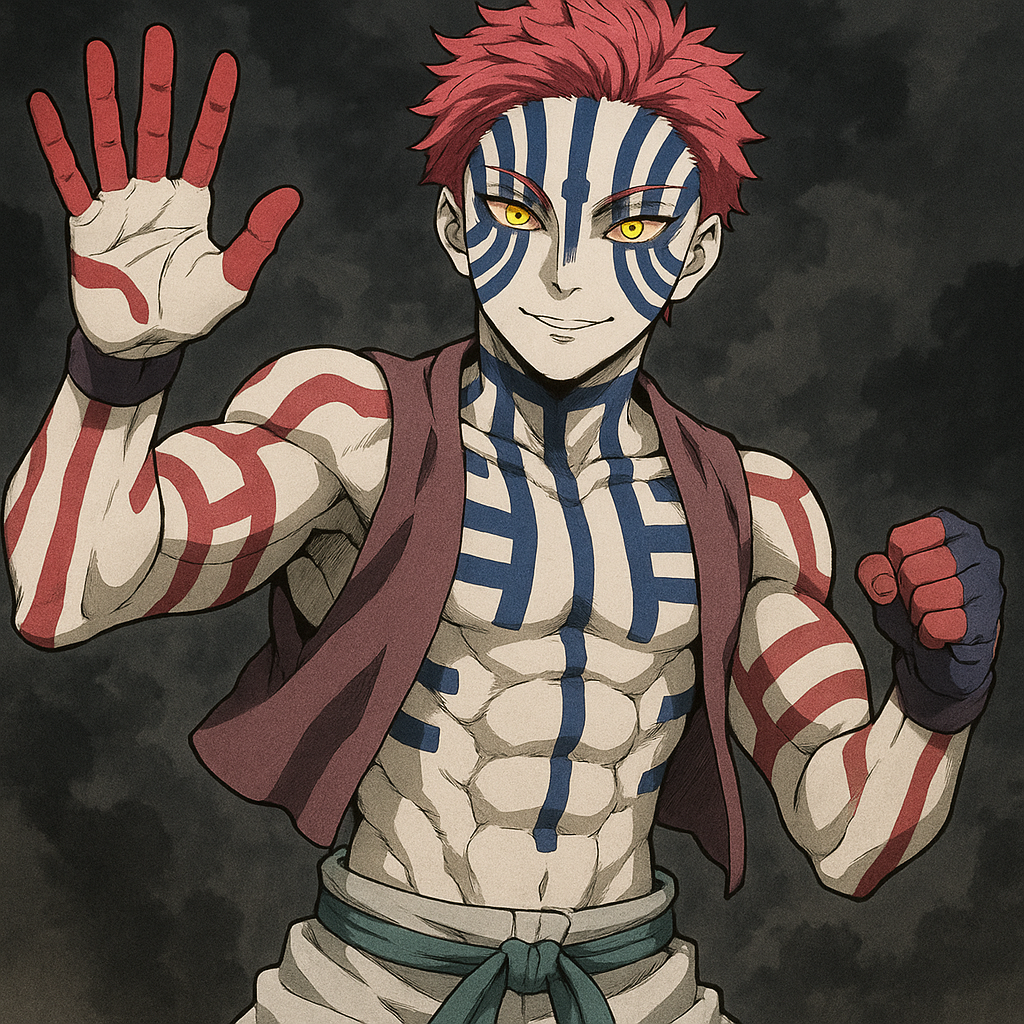

In [39]:
# Î™©Ìëú: Ïö∞Î¶¨Î∞ò ÎßàÏä§ÏΩîÌä∏ Ï∫êÎ¶≠ÌÑ∞ ÎßåÎì§Í∏∞
prompt = """ÌïòÏø†ÏßÄ"""
generate_image(prompt)